### EDA on [Citi Bike trip data](https://ride.citibikenyc.com/system-data)

Data collected was published on Jan 6th 2022, 07:36:57 pm , [link to zipped file](https://s3.amazonaws.com/tripdata/JC-202112-citibike-tripdata.csv.zip)

## Read files and Check data information

In [18]:
#Import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium

In [21]:
datapath = '../data/raw/JC-202112-citibike-tripdata.csv'

In [27]:
#Read in the downloaded data
data = pd.read_csv(datapath, parse_dates=['started_at','ended_at'])
#Check top 5 rows of the data
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,DE8FDF918B766B34,classic_bike,2021-12-22 18:44:12,2021-12-22 18:49:56,Marin Light Rail,JC013,Warren St,JC006,40.714584,-74.042817,40.721124,-74.038051,member
1,DFFA588D5D188F27,classic_bike,2021-12-11 12:32:58,2021-12-11 12:57:13,Warren St,JC006,Warren St,JC006,40.721124,-74.038051,40.721124,-74.038051,member
2,3A2A9CA5E1CC449A,classic_bike,2021-12-18 11:08:40,2021-12-18 11:21:10,Warren St,JC006,Warren St,JC006,40.721124,-74.038051,40.721124,-74.038051,member
3,72216E8C562A4E02,classic_bike,2021-12-11 17:28:08,2021-12-11 17:42:16,5 Corners Library,JC018,Warren St,JC006,40.734961,-74.059503,40.721124,-74.038051,member
4,A7B30B3C966FD8A1,classic_bike,2021-12-11 10:39:41,2021-12-11 10:54:56,City Hall - Washington St & 1 St,HB105,Warren St,JC006,40.737360,-74.030970,40.721124,-74.038051,casual


In [28]:
#Check data information number of rows, columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48021 entries, 0 to 48020
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             48021 non-null  object        
 1   rideable_type       48021 non-null  object        
 2   started_at          48021 non-null  datetime64[ns]
 3   ended_at            48021 non-null  datetime64[ns]
 4   start_station_name  48021 non-null  object        
 5   start_station_id    48021 non-null  object        
 6   end_station_name    47662 non-null  object        
 7   end_station_id      47662 non-null  object        
 8   start_lat           48021 non-null  float64       
 9   start_lng           48021 non-null  float64       
 10  end_lat             47875 non-null  float64       
 11  end_lng             47875 non-null  float64       
 12  member_casual       48021 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(7)
me

In [38]:
#Create new column from starttime column showing the day of the week
data['start_day']=data['started_at'].apply(lambda x:x.day_name())

data.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_day
0,DE8FDF918B766B34,classic_bike,2021-12-22 18:44:12,2021-12-22 18:49:56,Marin Light Rail,JC013,Warren St,JC006,40.714584,-74.042817,40.721124,-74.038051,member,Wednesday
1,DFFA588D5D188F27,classic_bike,2021-12-11 12:32:58,2021-12-11 12:57:13,Warren St,JC006,Warren St,JC006,40.721124,-74.038051,40.721124,-74.038051,member,Saturday
2,3A2A9CA5E1CC449A,classic_bike,2021-12-18 11:08:40,2021-12-18 11:21:10,Warren St,JC006,Warren St,JC006,40.721124,-74.038051,40.721124,-74.038051,member,Saturday


## Using Seaborn and Matplotlib for exploring the data

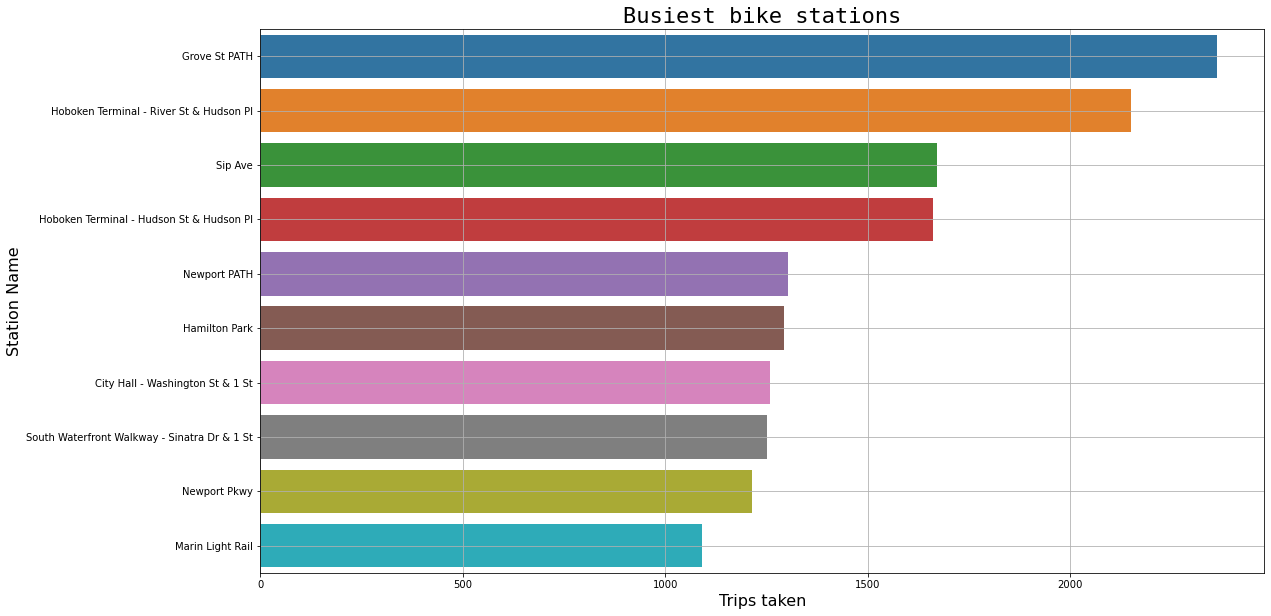

In [45]:
#Use seaborn and matplotlib to plot the top 10 busiest stations
startstation = data['start_station_name'].value_counts()[:10]
plt.figure(figsize=(18,10))
sns.barplot( x=startstation.values , y=list(startstation.index), 
 orient="h" )

#Add plot title, label axes and grid
plt.title('Busiest bike stations', size=22, family='monospace')
plt.ylabel('Station Name', fontsize=16)
plt.xlabel('Trips taken', fontsize=16)
plt.grid()
plt.tight_layout

#Save the output to file
plt.savefig("../images/busiest_stations.png", facecolor='white', dpi=300)

plt.show()

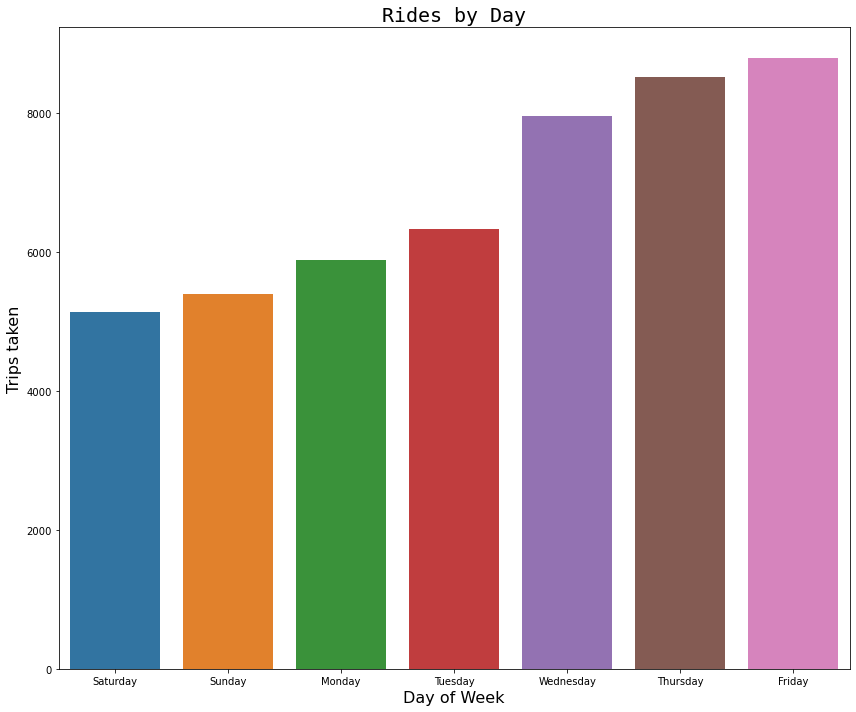

In [54]:
#Group by day of the week and create a subset of the data
group = data.groupby(['start_day'], as_index=False).agg(
    count_col=pd.NamedAgg(column="start_day", aggfunc="count")
)
group.rename(columns={'start_day': 'Day of Week', 
                    'count_col':'Trips taken'}, inplace=True)
group.sort_values(by='Trips taken',inplace=True)

#Use seaborn and matplotlib to plot graph showing busiest day of the week
plt.figure(figsize=(12,10))
ax = sns.barplot(x = 'Day of Week',
            y = 'Trips taken',
            data = group)
#Add plot title, label axes
plt.title('Rides by Day', size=20, family='monospace')
plt.ylabel('Trips taken', fontsize=16)
plt.xlabel('Day of Week', fontsize=16)
plt.tight_layout()

#Save the output to file
plt.savefig("../images/rides_by_day.png", facecolor='white',dpi=300)

plt.show()

In [98]:
#Using the aggregate with groupby to group and 
#count the number of occurences in each group and assign to a new dataframe
df_grouped = data.groupby(['start_station_id', 'start_station_name', 'start_lat',
       'start_lng'], as_index=False).agg(
    count_col=pd.NamedAgg(column="start_station_id", aggfunc="count")
)

print(len(df_grouped))

# Rename our columns
df_grouped.rename(columns={'start_station_id': 'Station ID', 
                    'start_station_name': 'Station Name', 
                    'start_lat': 'Lat', 
                    'start_lng': 'Lon', 
                    'count_col':'Number of Trips'}, inplace=True)

# Saving the dataframe to csv file
outpath = '../data/2021Dec.csv'
df_grouped.to_csv(outpath, index=False)

130


In [99]:
#Print statement to check for duplicate values
print(f"There are {df_grouped.duplicated(subset='Station ID').sum()},"
      f" duplicate values from a total of {len(df_grouped)},"
      f" values in the Dec 2021 cleaned dataset.")

There are 52, duplicate values from a total of 130, values in the Dec 2021 cleaned dataset.


## Converting DataFrame to GeoDataFrame

### Read and process our cleaned 2021 datasets for mapping


In [133]:
#Convert DataFrame to GeoDataFrame
#Assign crs to the geodataframe
#sorting dataframe by Trips

gdf_Dec2021 = gpd.GeoDataFrame(df_grouped, 
                               geometry=gpd.points_from_xy(df_grouped.Lat, df_grouped.Lon), 
                               crs='epsg:4326'
                              )

gdf_Dec2021.sort_values(by="Number of Trips", ascending=False, inplace=True)

gdf_Dec2021[:3]

,Station ID,Station Name,Lat,Lon,Number of Trips,geometry
49,JC005,Grove St PATH,40.719586,-74.043117,2360,POINT (40.71959 -74.04312)
2,HB102,Hoboken Terminal - River St & Hudson Pl,40.736068,-74.029127,2133,POINT (40.73607 -74.02913)
89,JC056,Sip Ave,40.730897,-74.063913,1671,POINT (40.73090 -74.06391)


## Static Map

In [111]:
# Tests on BaseMaps

In [126]:
cx.providers.OpenStreetMap

{'Mapnik': {'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
  'max_zoom': 19,
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'attribution': '(C) OpenStreetMap contributors',
  'name': 'OpenStreetMap.Mapnik'},
 'DE': {'url': 'https://{s}.tile.openstreetmap.de/tiles/osmde/{z}/{x}/{y}.png',
  'max_zoom': 18,
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'attribution': '(C) OpenStreetMap contributors',
  'name': 'OpenStreetMap.DE'},
 'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
  'max_zoom': 18,
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'attribution': '(C) OpenStreetMap contributors',
  'bounds': [[45, 5], [48, 11]],
  'name': 'OpenStreetMap.CH'},
 'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
  'max_zoom': 20,
  'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
  'name': 'OpenStreetMap.France'},
 'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
  'max_zoom': 19,
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
  'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
  'name': 'OpenStreetMap.HOT'},
 'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
  'max_zoom': 19,
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
  'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
  'bounds': [[46.2, -5.5], [50, 0.7]],
  'name': 'OpenStreetMap.BZH'},
 'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
  'max_zoom': 18,
  'attribution': '(C) OpenStreetMap contributors',
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'name': 'OpenStreetMap.BlackAndWhite'}}

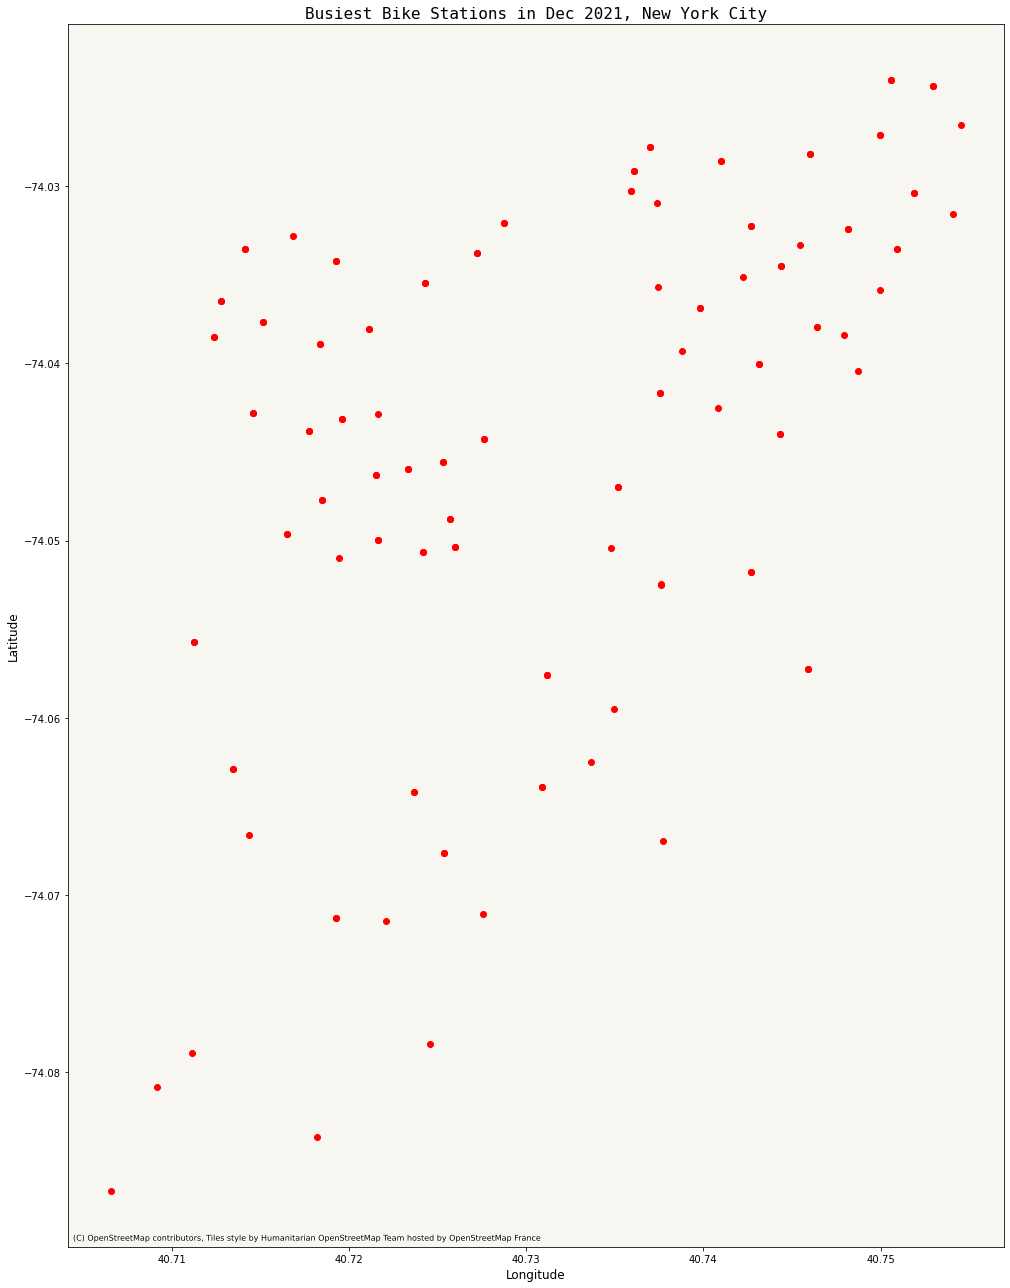

In [138]:
#Import contextly for our basemaps
import contextily as cx

# Create subplot for 2018 data
fig, ax = plt.subplots(figsize=(15,18))

#Plot the static map
gdf_Dec2021.plot(ax=ax,c="red") 

# Set title and label axes
plt.title("Busiest Bike Stations in Dec 2021, New York City", 
          fontsize=16,family="Monospace")
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.tight_layout()

#Add basemap from contextily
gdf_Dec2021.to_crs(epsg=3857)
cx.add_basemap(ax, crs=gdf_Dec2021.crs.to_string(), source=cx.providers.OpenStreetMap.HOT)
#Save the figure as png file
#plt.savefig("2018_static_map", facecolor="white", dpi=196)

## Interactive Map

In [129]:
#Import folium package for interactive mapping
import folium

#Create Map instance
m=folium.Map(location=[40.751873, -73.977706], zoom_start=13, attr='MyData')

#Add another basemap layer
#folium.TileLayer('OpenStreetMap', show =True).add_to(m)

#Add Title to Interactive map
loc = 'Top 100, Busiest Bike Stations in New York City in Dec 2021'
title_html = '''
             <h3 align="center" style="font-size:18px"><b>{}</b></h3>
             '''.format(loc) 
m.get_root().html.add_child(folium.Element(title_html))

#Create feature groups
f1=folium.FeatureGroup("Busiest Stations in 2021")

#Add the dataframes to our feature groups
gdf_Dec2021 = folium.GeoJson(gdf_Dec2021,marker=folium.Marker(
                        icon=folium.Icon(color='red')),
                        tooltip=folium.GeoJsonTooltip(
                        fields=["Station Name","Number of Trips"]),
                       ).add_to(f1)
#Add feature groups to Map instance
f1.add_to(m)

#Add layer Control
folium.LayerControl().add_to(m)  # use folium to add layer control
m

In [130]:
outfp = "../images/interactive_map.html"
m.save(outfp)